<a href="https://colab.research.google.com/github/MrD0balina/Fourth-Year-Project---Neutrino-Oscillations/blob/main/Week_9_Numerical_Integration_Further_weighting_work_All_in_the_pursuit_of_physically_representative_histograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from scipy import interpolate
from scipy.interpolate import CubicSpline


from textwrap import wrap
from math import cos
from math import pi
from math import log

import math
import pandas as pd

In [ ]:
## Reading in data from 2014 study; "Measurement of charged pion production yields offf the NuMI target"

Pion_Plots_df1 = pd.read_csv('Week 6 - Pion Plots TABLE 1 CSV - Copy - Now Saved as UTF 8 - Pion Plots TABLE 1 CSV - Copy - Now Saved as UTF 8.csv')

## Note; Column names appear in the first row of the dataframe.  This is an extra row.

## Renaming all of the columns of the dataframe using entries in the first row.
header_column_names = Pion_Plots_df1.loc[0, :].values.flatten().tolist()
Pion_Plots_df1 = Pion_Plots_df1.set_axis( header_column_names , axis = 1  )
## Removing the extra row.
Pion_Plots_df1 = Pion_Plots_df1.drop(0)
Pion_Plots_df1.columns = ['pz (GeV=c)',
                          'pT (GeV=c)',
                          '$N_{\pi^+}/POT$ (per proton on target)',
                          'ðN(pi^+) stat + bkgd (%)',
                          'ðN(pi^+) syst (%)',
                          '$N_{\pi^-}/POT$ (per proton on target)',
                          'ðN(pi^-) stat + bkgd (%)',
                          'ðN(pi^-) syst (%)',
                          'R = N(pi^-) / N(pi^+)',
                          'ðR stat + bkgd (%)',
                          'ðR syst (%)']

In [ ]:
############## MANIPULATING THE DATAFRAME INTO DESIRED CONFIGURATION #################

## Converting the first column of the dataframe from string to float values.

## Calculating the bin width of each row

interval_mid_list = []
bin_width_list = []

for i in range(len(Pion_Plots_df1['pz (GeV=c)'])):

  i = i + 1
  X = Pion_Plots_df1['pz (GeV=c)'][i]
  Y = X [ 1 : -1 ]
  Z =  Y.split(",")

  for j in range(len(Z)):
    Z[j] = float(Z[j])

  diff = abs( ( Z[0] - Z[1] ) / 2  )

  bin_width_list.append(diff)

  interval_mid_value = min(Z) + diff
  diff = 0
  interval_mid_list.append(interval_mid_value)

bin_width_array = np.array(bin_width_list)
interval_mid_array = np.array(interval_mid_list)

## Adding new columns to the dataframe

Pion_Plots_df1['pz (GeV=c) - mid range value'] = interval_mid_array.tolist()
Pion_Plots_df1['bin width'] = bin_width_array.tolist()

## Moving the newly created columns tto desired positions

column_to_move = Pion_Plots_df1.pop("pz (GeV=c) - mid range value") # storing a ccolumn in the dataframe as a neew variable
Pion_Plots_df1.insert(1, "pz (GeV=c) - mid range value", column_to_move) # moving the stored column to the desired place in the dataframe.

column_to_move = Pion_Plots_df1.pop("bin width")
Pion_Plots_df1.insert(2, "bin width", column_to_move)

## Allocating colours to rows of the dataframe based upon pion transverse momentum
## Creating a new column in the dataframe to store these allocated colour codes

pT_colour_code_list = []

for i in range(len(Pion_Plots_df1['pT (GeV=c)'])):

  i = i + 1
  X = Pion_Plots_df1['pT (GeV=c)'][i]
  Y = X [ 1 : -1 ]
  Z =  Y.split(",")

  for j in range(len(Z)):
    Z[j] = float(Z[j])

  if Z[0] == 0.00:
    colour_code = 0
  elif Z[0] == 0.10:
    colour_code = 1
  elif Z[0] == 0.20:
    colour_code = 2
  elif Z[0] == 0.30:
    colour_code = 3
  elif Z[0] == 0.40:
    colour_code = 4
  else:
    colour_code = 5

  pT_colour_code_list.append(colour_code)

pT_colour_code_array = np.array(pT_colour_code_list)

## Creating a new pT colour codes column in dataframe and moving it to the desired position.

Pion_Plots_df1['pT (GeV=c) - plot colour codes'] = pT_colour_code_array.tolist()
column_to_move = Pion_Plots_df1.pop("pT (GeV=c) - plot colour codes")
Pion_Plots_df1.insert(3, "pT (GeV=c) - plot colour codes", column_to_move)

## Converting columns into floats - in order to make plotting possible

Pion_Plots_df1["N_{\pi^+}/POT --- float"] = Pion_Plots_df1["$N_{\pi^+}/POT$ (per proton on target)"].astype(float)
column_to_move = Pion_Plots_df1.pop("N_{\pi^+}/POT --- float")
Pion_Plots_df1.insert(5, "N_{\pi^+}/POT --- float", column_to_move)

## We divide the count by the bin width.  When we make the height of each bin the count divided by the bin width, the total area of the bin is equal to the count.

Pion_Plots_df1["N_{\pi^+}/POT / bin width"]  =  Pion_Plots_df1["N_{\pi^+}/POT --- float"] / Pion_Plots_df1["bin width"]
column_to_move = Pion_Plots_df1.pop("N_{\pi^+}/POT / bin width")
Pion_Plots_df1.insert(6, "N_{\pi^+}/POT / bin width", column_to_move)

## creating a new column in the dataframe that will be filled with the final values to be plotted in the complete and correct plot

Pion_Plots_df1["Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"]

#################### Using df.loc - this is in line with the Copy on Write - Old way is through Chained Assignment (for loop etc., etc.) ####################

Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 0, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"]
Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 1, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 3
Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 2, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 10
Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 3, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 30
Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 4, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 100
Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 5, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 300

## Final reorganisation of columns in the dataframe

column_to_move = Pion_Plots_df1.pop("Final pi^+ plot value")
Pion_Plots_df1.insert(8, "Final pi^+ plot value", column_to_move)

column_to_move = Pion_Plots_df1.pop("$N_{\pi^+}/POT$ (per proton on target)")
Pion_Plots_df1.insert(5, "$N_{\pi^+}/POT$ (per proton on target)", column_to_move)

column_to_move = Pion_Plots_df1.pop("$N_{\pi^+}/POT$ (per proton on target)")
Pion_Plots_df1.insert(5, "$N_{\pi^+}/POT$ (per proton on target)", column_to_move)


## Adding two columns for plotting purposes

Pion_Plots_df1["error bar capsize"] = float(1)
Pion_Plots_df1["error bar line width"] = float(0.5)

In [ ]:
######################### SELECTING THE PIONS WITH SUFFICIENT ENERGY - BY REMOVING PIONS WITH LONGITUDINAL MOMENTUM LESS THAN 5GeV/c  ######################

######################### SEE COMMENT AT END OF FIRST LINE ######################

# # colours = {  0 : "blue" , 1 : "red" , 2 : "green" , 3 : "purple" , 4 : "orange" , 5 : "brown"  }

green_dots_only_y_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 2  ]['Final pi^+ plot value'] )    ## I have no idea how this line of code works ##
green_dots_only_x_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 2  ]['pz (GeV=c) - mid range value'] )

#green_dots_new_x = [green_dots_only_x_axis_values_list for green_dots_only_x_axis_values_list in green_dots_only_x_axis_values_list if green_dots_only_x_axis_values_list >= 1.5]

green_dots_new_x = [green_dots_only_x_axis_values_list for green_dots_only_x_axis_values_list in green_dots_only_x_axis_values_list if green_dots_only_x_axis_values_list >= 5]

green_dots_new_y = ( green_dots_only_y_axis_values_list[  len(green_dots_only_y_axis_values_list)  - ( len(green_dots_new_x) ) : len(green_dots_only_y_axis_values_list) ]  )

red_dots_only_y_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 1  ]['Final pi^+ plot value'] )
red_dots_only_x_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 1  ]['pz (GeV=c) - mid range value'] )
red_dots_new_x = [red_dots_only_x_axis_values_list for red_dots_only_x_axis_values_list in red_dots_only_x_axis_values_list if red_dots_only_x_axis_values_list >= 5]
red_dots_new_y = ( red_dots_only_y_axis_values_list[  len(red_dots_only_y_axis_values_list)  - ( len(red_dots_new_x) ) : len(red_dots_only_y_axis_values_list) ]  )

blue_dots_only_y_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 0  ]['Final pi^+ plot value'] )
blue_dots_only_x_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 0  ]['pz (GeV=c) - mid range value'] )
blue_dots_new_x = [blue_dots_only_x_axis_values_list for blue_dots_only_x_axis_values_list in blue_dots_only_x_axis_values_list if blue_dots_only_x_axis_values_list >= 5 ]
blue_dots_new_y = ( blue_dots_only_y_axis_values_list[  len(blue_dots_only_y_axis_values_list)  - ( len(blue_dots_new_x) ) : len(blue_dots_only_y_axis_values_list) ] )

purple_dots_only_y_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 3  ]['Final pi^+ plot value'] )
purple_dots_only_x_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 3  ]['pz (GeV=c) - mid range value'] )
purple_dots_new_x = [purple_dots_only_x_axis_values_list for purple_dots_only_x_axis_values_list in purple_dots_only_x_axis_values_list if purple_dots_only_x_axis_values_list >= 5 ]
purple_dots_new_y = ( purple_dots_only_y_axis_values_list[  len(purple_dots_only_y_axis_values_list)  - ( len(purple_dots_new_x) ) : len(purple_dots_only_y_axis_values_list) ] )

orange_dots_only_y_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 4  ]['Final pi^+ plot value'] )
orange_dots_only_x_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 4  ]['pz (GeV=c) - mid range value'] )
orange_dots_new_x = [orange_dots_only_x_axis_values_list for orange_dots_only_x_axis_values_list in orange_dots_only_x_axis_values_list if orange_dots_only_x_axis_values_list >= 5 ]
orange_dots_new_y = ( orange_dots_only_y_axis_values_list[ len(orange_dots_only_y_axis_values_list)  - ( len(orange_dots_new_x) ) : len(orange_dots_only_y_axis_values_list) ] )

brown_dots_only_y_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 5  ]['Final pi^+ plot value'] )
brown_dots_only_x_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 5  ]['pz (GeV=c) - mid range value'] )
brown_dots_new_x = [brown_dots_only_x_axis_values_list for brown_dots_only_x_axis_values_list in brown_dots_only_x_axis_values_list if brown_dots_only_x_axis_values_list >= 5 ]
brown_dots_new_y = ( brown_dots_only_y_axis_values_list[ len(brown_dots_only_y_axis_values_list)  - ( len(brown_dots_new_x) ) : len(brown_dots_only_y_axis_values_list) ] )


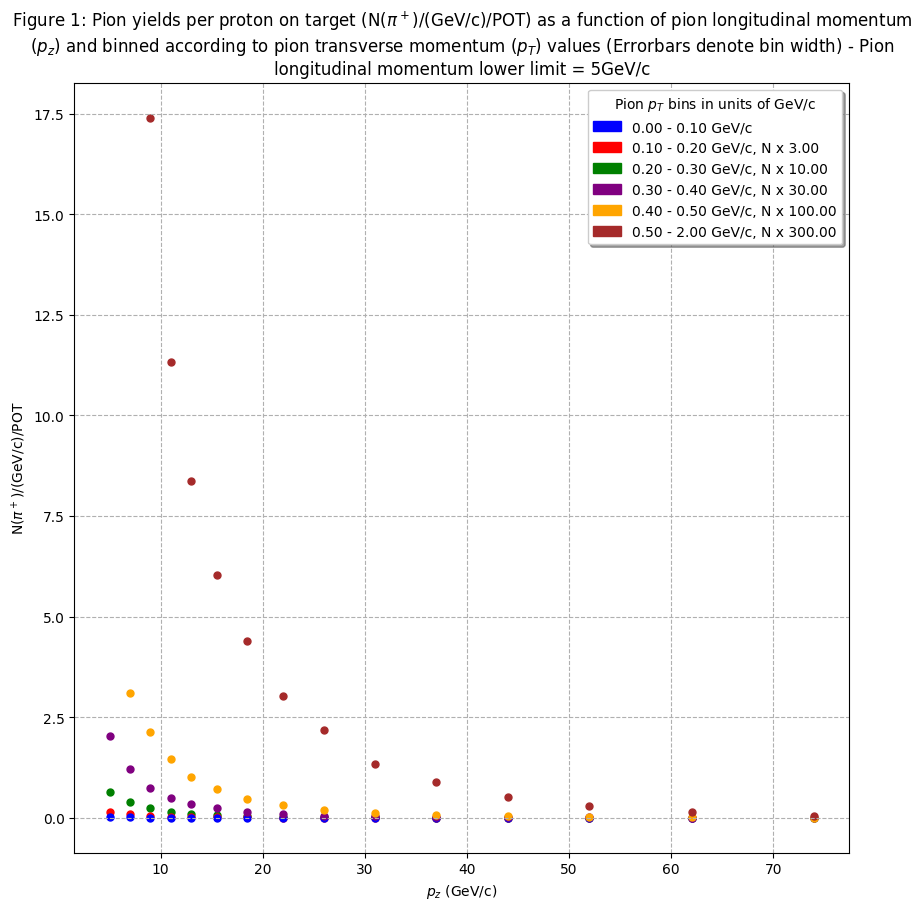

In [ ]:
## CORRECT PLOT WITH ERROR BARS ##

colours = {  0 : "blue" , 1 : "red" , 2 : "green" , 3 : "purple" , 4 : "orange" , 5 : "brown"  }

labels_list = [ "0.00 - 0.10 GeV/c" , "0.10 - 0.20 GeV/c, N x 3.00"  ,  "0.20 - 0.30 GeV/c, N x 10.00"  ,  "0.30 - 0.40 GeV/c, N x 30.00"  ,  "0.40 - 0.50 GeV/c, N x 100.00"  ,  "0.50 - 2.00 GeV/c, N x 300.00"  ]

blue_patch = mpatches.Patch(color='blue', label='0.00 - 0.10 GeV/c' )
red_patch = mpatches.Patch(color='red', label='0.10 - 0.20 GeV/c, N x 3.00')
green_patch = mpatches.Patch(color='green', label='0.20 - 0.30 GeV/c, N x 10.00')
purple_patch = mpatches.Patch(color='purple', label='0.30 - 0.40 GeV/c, N x 30.00')
orange_patch = mpatches.Patch(color='orange', label='0.40 - 0.50 GeV/c, N x 100.00')
brown_patch = mpatches.Patch(color='brown', label='0.50 - 2.00 GeV/c, N x 300.00')

# handles_for_legend =  [  blue_patch , red_patch ,  green_patch ,  purple_patch , orange_patch , brown_patch  ]

handles_for_legend =  [  blue_patch , red_patch ,  green_patch , purple_patch , orange_patch , brown_patch ]


f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.scatter(   x = green_dots_new_x   ,   y = green_dots_new_y   ,   c = "green" , s = 25 , label =  labels_list )
plt.scatter(   x = red_dots_new_x   ,   y = red_dots_new_y   ,   c = "red" , s = 25 , label =  labels_list )
plt.scatter(   x = blue_dots_new_x   ,   y = blue_dots_new_y   ,   c = "blue" , s = 25 , label =  labels_list )
plt.scatter(   x = purple_dots_new_x   ,   y = purple_dots_new_y   ,   c = "purple" , s = 25 , label =  labels_list )
plt.scatter(   x = orange_dots_new_x   ,   y = orange_dots_new_y   ,   c = "orange" , s = 25 , label =  labels_list )
plt.scatter(   x = brown_dots_new_x   ,   y = brown_dots_new_y   ,   c = "brown" , s = 25 , label =  labels_list )


#plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"] * 300 , yerr  =  None , xerr = Pion_Plots_df1["bin width"] , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"] )

#plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"], yerr  =  None , xerr = Pion_Plots_df1["bin width"] ,
#             ls = None , fmt = 'none' , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours), elinewidth = 0.5 , capsize  = Pion_Plots_df1["error bar capsize"])

# plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"], yerr  =  None , xerr = Pion_Plots_df1["bin width"] ,
#             ls = None , fmt = 'none' , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours), elinewidth = Pion_Plots_df1["error bar line width"] )

# plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"], yerr  =  None , xerr = Pion_Plots_df1["bin width"] ,
#              ls = None , fmt = 'none' , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours), elinewidth = 0.5  )

# plt.xscale("log")
# plt.yscale("log")
plt.grid( True , which = "both" , ls = "--" )

plt.legend(  labels = labels_list , handles = handles_for_legend , shadow = True , fancybox = True , title = r"Pion $p_{T}$ bins in units of GeV/c" )

plt.title("\n".join(wrap(r"Figure 1: Pion yields per proton on target (N($\pi^+$)/(GeV/c)/POT) as a function of pion longitudinal momentum ($p_{z}$) and binned according to pion transverse momentum ($p_{T}$) values (Errorbars denote bin width) - Pion longitudinal momentum lower limit = 5GeV/c" , 120 ) ) )

plt.xlabel(r"$p_{z}$ (GeV/c)")
plt.ylabel(r"N($\pi^+$)/(GeV/c)/POT")

plt.savefig('Figure 1: Positive pion yields per proton on target - binned according to pion longitudinal and transverse momenta .png' , dpi=200 , bbox_inches = "tight")

plt.show()

In [ ]:
######################### PRODUCING AN INTERPOLATION  ######################


xnew_array = np.linspace(min(green_dots_new_x), max(green_dots_new_x), 1000)

green_dots_new_x_array = np.array(green_dots_new_x)

green_dots_new_y_array = np.array(green_dots_new_y)

chosen_interpolator = interpolate.interp1d(   green_dots_new_x_array  ,    green_dots_new_y_array , kind = "quadratic" , bounds_error = False  )

ynew_array = chosen_interpolator(xnew_array)

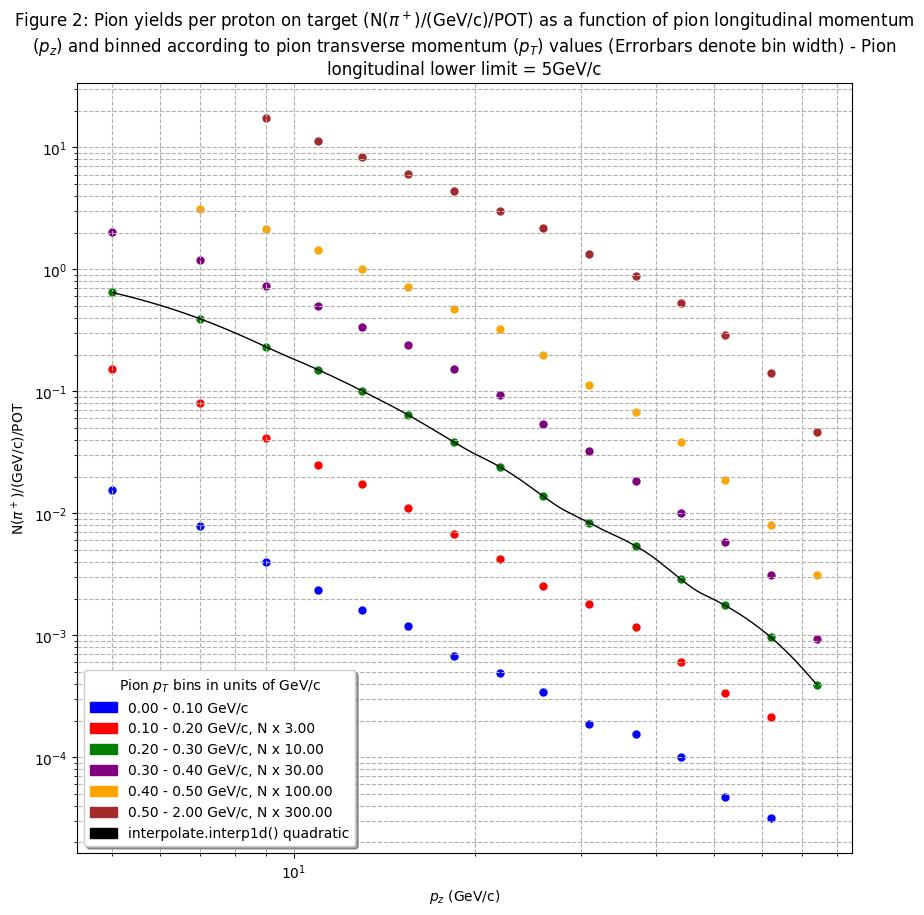

In [ ]:
######################### PLOTTING PION DATA POINTS AS ABOVE, BUT THIS TIME WITH THE INTERPOLATION  ######################

colours = {  0 : "blue" , 1 : "red" , 2 : "green" , 3 : "purple" , 4 : "orange" , 5 : "brown"  }

labels_list = [ "0.00 - 0.10 GeV/c" , "0.10 - 0.20 GeV/c, N x 3.00"  ,  "0.20 - 0.30 GeV/c, N x 10.00"  ,  "0.30 - 0.40 GeV/c, N x 30.00"  ,  "0.40 - 0.50 GeV/c, N x 100.00"  ,  "0.50 - 2.00 GeV/c, N x 300.00"  ,  "interpolate.interp1d() quadratic"   ]


blue_patch = mpatches.Patch(color='blue', label='0.00 - 0.10 GeV/c' )
red_patch = mpatches.Patch(color='red', label='0.10 - 0.20 GeV/c, N x 3.00')
green_patch = mpatches.Patch(color='green', label='0.20 - 0.30 GeV/c, N x 10.00')
purple_patch = mpatches.Patch(color='purple', label='0.30 - 0.40 GeV/c, N x 30.00')
orange_patch = mpatches.Patch(color='orange', label='0.40 - 0.50 GeV/c, N x 100.00')
brown_patch = mpatches.Patch(color='brown', label='0.50 - 2.00 GeV/c, N x 300.00')
black_patch = mpatches.Patch(color='black', label="interpolate.interp1d() quadratic")


handles_for_legend =  [  blue_patch , red_patch ,  green_patch , purple_patch , orange_patch , brown_patch ,  black_patch ]


f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.scatter(   x = green_dots_new_x   ,   y = green_dots_new_y   ,   c = "green" , s = 25 , label =  labels_list )
plt.scatter(   x = red_dots_new_x   ,   y = red_dots_new_y   ,   c = "red" , s = 25 , label =  labels_list )
plt.scatter(   x = blue_dots_new_x   ,   y = blue_dots_new_y   ,   c = "blue" , s = 25 , label =  labels_list )
plt.scatter(   x = purple_dots_new_x   ,   y = purple_dots_new_y   ,   c = "purple" , s = 25 , label =  labels_list )
plt.scatter(   x = orange_dots_new_x   ,   y = orange_dots_new_y   ,   c = "orange" , s = 25 , label =  labels_list )
plt.scatter(   x = brown_dots_new_x   ,   y = brown_dots_new_y   ,   c = "brown" , s = 25 , label =  labels_list )

# plt.plot(  xnew_array  , ynew_array  , color = "black" , label = "interpolate.interp1d() quadratic" , linewidth = 1  )

plt.plot(  xnew_array  , ynew_array  , color = "black" , label =  labels_list  , linewidth = 1  )

plt.xscale("log")
plt.yscale("log")
plt.grid( True , which = "both" , ls = "--" )

plt.legend(  labels = labels_list , handles = handles_for_legend , shadow = True , fancybox = True , title = r"Pion $p_{T}$ bins in units of GeV/c" )

plt.title("\n".join(wrap(r"Figure 2: Pion yields per proton on target (N($\pi^+$)/(GeV/c)/POT) as a function of pion longitudinal momentum ($p_{z}$) and binned according to pion transverse momentum ($p_{T}$) values (Errorbars denote bin width) - Pion longitudinal lower limit = 5GeV/c" , 120 ) ) )

plt.xlabel(r"$p_{z}$ (GeV/c)")
plt.ylabel(r"N($\pi^+$)/(GeV/c)/POT")

plt.savefig('Figure 3: Positive pion yields per proton on target - binned according to pion longitudinal and transverse momenta .png' , dpi=200 , bbox_inches = "tight")

plt.show()

## Weighting pions according to their longitudinal velocities.

In [ ]:
math.atan( (math.pi) / 4 )

0.6657737500283538

In [ ]:
np.arctan( (math.pi) / 4 )

0.6657737500283538

(10000000,) (10000000,) (10000000,) (10000000,) (10000000,)


Text(0, 0.5, '$theta_{MAX}$ (radians???)')

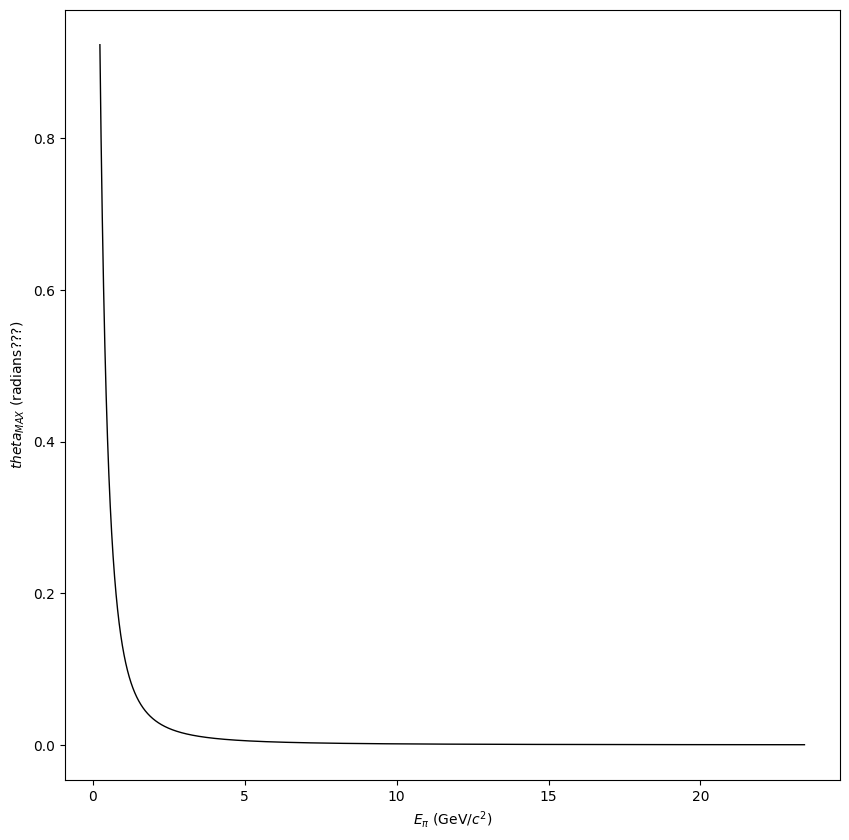

In [ ]:
E_v_star = 29.8 * ( 10 ** -3 )
m_pi = 139.6 * ( 10 ** -3 )

theta = 0.00

E_v = np.linspace( 0.1 , 10 , 10000000 )
my_mean = 120
my_std = 1.2

cos_theta_star = (  ( 1 - ( ( E_v ** 2 ) / ( E_v_star ** 2 ) ) * ( ( 1 / ( ( cos(theta) ) ** 2 ) ) - 1 ) ) ** ( 1 / 2 ) )

total_E_pi = (  (m_pi * E_v )    /  (   E_v_star * ( 1 + cos_theta_star )  )   )

relativistic_KE_pi =  (  ( ( total_E_pi ) ** 2 ) - ( ( m_pi ) ** 2 )  )

gamma_array = ( ( relativistic_KE_pi / m_pi ) + 1 )

beta_array = (  ( 1 - ( 1 / ( ( gamma_array ) ** 2 ) ) ) ** ( 1 / 2 )  )

theta_max = np.arctan(  1 / (beta_array * gamma_array) )

##################        beta_array =                #########################

# print(type( relativistic_KE_pi ) , type( total_E_pi ) )

print( np.shape(relativistic_KE_pi) , np.shape(total_E_pi), np.shape(gamma_array), np.shape(beta_array) , np.shape(theta_max) )

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)


# plt.scatter(   x = total_E_pi   ,   y = theta_max   ,   c = "green" , s = 5 )

plt.plot(  total_E_pi  , theta_max  , color = "black" , label =  "interpolate.interp1d() quadratic" , linewidth = 1  )

plt.xlabel(r"$E_{\pi}$ (GeV/$c^2$)")
plt.ylabel(r"$theta_{MAX}$ (radians???)")



In [ ]:
############# Attempting to integrate the above plot ################

def trapezoid(x_axis, y_axis):
    """Integrate d using the trapezoid rule and return the value of the integral

    d: array of data points evaluated at even spacing h (Each value in this array can be considered as a length of one of the parallel sides of a trapezium)
    h: spacing between data points (the height of each trapezium)

    """

    a = np.ones_like(x_axis)
    b = a.size  # Constructing weights array
    a[b-1] = 1/2  # Constructing weights array
    a[0] = 1/2  # Constructing weights array
    array_product = x_axis * a

    integral_weights_array = y_axis*array_product

    I = sum(integral_weights_array)

    return I , integral_weights_array

In [ ]:
I , integral_weights_array = trapezoid( total_E_pi, theta_max )

In [ ]:
print(integral_weights_array)

[0.10817673 0.21635369 0.2163539  ... 0.0059587  0.0059587  0.00297935]


In [ ]:
m_pi = 139.6 * ( 10 ** -3 )        # Units = GeV ( Source = PDF saved as: "(FIRST PLOTTING TASK) - An Off-Axis Neutrino Beam - Kirk T. McDonald - 0111033v1" )

E_v_star = 29.8 * ( 10 ** -3 )     # Units = GeV ( Source =  = PDF saved as: "(FIRST PLOTTING TASK) - An Off-Axis Neutrino Beam - Kirk T. McDonald - 0111033v1" )

# E_pro = 12                     # Units = GeV  ( Source = https://en.wikipedia.org/wiki/Fermilab#Fermilab_Accelerator_Complex )

# # E_pro = 120

In [ ]:
def FIRST_TRY_Integral_Weighted_Function( theta ):


        E_v = np.linspace( 0.1 , 10 , 10000000 )


        my_mean = 120   ## This is the correct mean proton energy

        my_std = 1.2  # standard deviation, "spread" or "width"    #### WHAT IS THE STANDARD DEVITAITON OF THE PROTON ENERGY DISTRIBUTION FOR PROTONS COMING OUT OF THE MAIN INJECTOR? ####
                                                                   #### My standard deviation is very large ####

        E_pro_array = np.random.normal(loc = my_mean, scale = my_std, size=10000000) ## Producing an array of proton energies.

        cos_theta_star = (  ( 1 - ( ( E_v ** 2 ) / ( E_v_star ** 2 ) ) * ( ( 1 / ( ( cos(theta) ) ** 2 ) ) - 1 ) ) ** ( 1 / 2 ) )

        E_pi = (  (m_pi * E_v )    /  (   E_v_star * ( 1 + cos_theta_star )  )   )

        P_pi = ( ( ( E_pi **2 )  -  ( m_pi **2 )  ) ** ( 1 / 2 ) )   # Convert energies to momenta - BECAUSE the data taken from the reference is a table with longitudinal pion momenta


        Weighted_Pion_Flux =  chosen_interpolator(P_pi)


        Rel_Neu_Flux = ( ( ( E_pro_array - E_pi ) ** 5 ) * ( ( E_pi * E_v ) / ( cos_theta_star ) ) )   ## Proton energy array is now included ##

        Rel_Neu_Flux = Weighted_Pion_Flux * Rel_Neu_Flux / integral_weights_array

        Rel_Neu_Flux[np.isnan(Rel_Neu_Flux)] = 0


        return  E_v , Rel_Neu_Flux , E_pro_array , E_pi , Weighted_Pion_Flux

<ipython-input-88-b6b749cba1a5>:14: RuntimeWarning: invalid value encountered in sqrt
  cos_theta_star = (  ( 1 - ( ( E_v ** 2 ) / ( E_v_star ** 2 ) ) * ( ( 1 / ( ( cos(theta) ) ** 2 ) ) - 1 ) ) ** ( 1 / 2 ) )


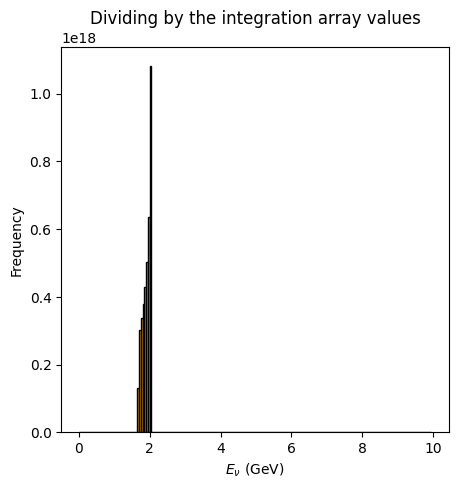

In [ ]:
# Histogram of relative neutrino flux ON BEAN AXIS

E_v , Rel_Neu_Flux , E_pro_array , E_pi , Weighted_Pion_Flux = FIRST_TRY_Integral_Weighted_Function( 0.0146 )
#display((np.shape(y_1)))
plt.figure(figsize=(5, 5))
#plt.plot( x_1 , y_1 , "-o" , color = "brown", linewidth = 0.5 , markersize = 1, label = r'$\theta$ = 0.014' )
plt.hist( E_v  , bins = np.arange( 0 , 10 , 0.05 )  , weights =  Rel_Neu_Flux , edgecolor = "black" , ls = "-" , color = "orange" )
plt.title("\n".join(wrap(r"Dividing by the integration array values " , 80 ) ) )
plt.xlabel(r"$E_{\nu}$ (GeV)")
plt.ylabel("Frequency")
plt.show()

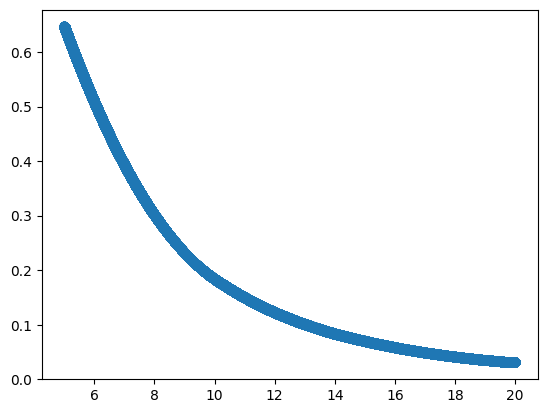

In [ ]:
P_pi = np.linspace( 0.9 , 20 , 1000000)


Weighted_Pion_Flux =  chosen_interpolator(P_pi)

plt.scatter(P_pi , Weighted_Pion_Flux)

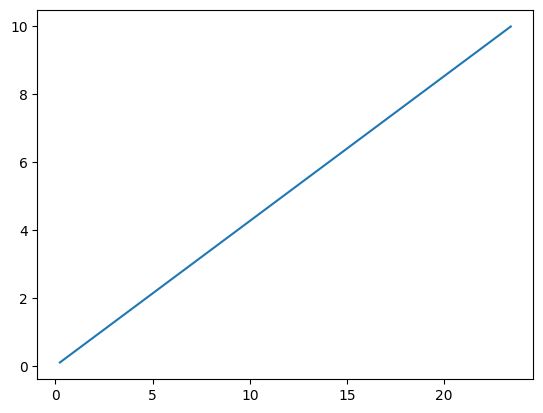

In [ ]:
plt.plot(E_pi , E_v)

#Things to do:

-1) BUY LAPTOP.  INSTALL VSCODE.  START USING SCRIPTS.  easy.

0) TIDY UP YOURR CODE.  ADD COMMENTS.  NEATLY DEFINE ALL FUNCTIONS... NETALY AND LOGICALLY NAME VARIABLES.

1) Plot a different graph using a linear scale.  This is the graph of the pion longitudinal momenta data.   My current plot is log-log.  I can still use this plot in the report, but I need to go to a linear scale to better interpolate... and hopefully produce histograms that replicate real world measurements at the near NOVA detector.

2) Fit an exponential to all of the data.  So, for all the green dots, or all the red dots, or whatever colour.

3) Theta_detector and Theta_max ... the relative sizes of these two angles determines if all neutrinos hit detector.  The relative sizes of the angles also determines if one should be divided by the other or not.  If Theta_detector is smaller than Theta_max, we need to do Theta_detector / Theta_max  in order to get the proportion of neutrinos that actually arrive at the detector.

4) Then determine a small cut off angle called epsilon.  Have all angles above this epsilon receive a reducing weighting.  All angles below this epsilon should have no weighting at all.

5) I think she was saying that epsilon is Theta_detector.

6) Then work on producing more histograms for on and off axis.

7) See if your plots have a nice natural drop off, rather than the sharp sudden cut off they currently exhibit.

8) NOTE ON THE INTERPOLATOR:  FEATURING ALL THE DATA POINTS SHOULDD TAKE CARE OF THE LOWER ENERGY PIONS AND WILL HOPEFULLY LEADD TO LOWEER ENERGY NEUTRINOS BEING PRODUCED IN THE SIMULATION.


9) Complete Checkpoint 1 to Abbey.

10) Send Checkpoint 1 to Abbey.

11) Start to write out the introduction.  Include a brief historical account full of citations... preferentially the original papers that first discussed the neutrino.

12) MOVE ON TO NEXT CHALLENGE... THE DACAY TUBE PHYSICS... (SEE NOTES TAKEN IN MEETING)

13) ALSO see document Abbey sent you referring to page 27


In [ ]:
def FIRST_TRY_Relative_Neutrino_Flux_Plotter_includes_Proton_Energy_Uncertainty_and_Pion_Weighting( theta ):

        #E_v = np.linspace( 0.5 , 10 , 10000000 )

        #E_v = np.linspace( 1.8 , 10 , 10000000 )

        E_v = np.linspace( 0.5 , 10 , 10000000 )

        #E_v_2 = np.linspace( 0.5 , 10 , 10000000 )

        my_mean = 120   ## This is the correct mean proton energy

        my_std = 1.2  # standard deviation, "spread" or "width"    #### WHAT IS THE STANDARD DEVITAITON OF THE PROTON ENERGY DISTRIBUTION FOR PROTONS COMING OUT OF THE MAIN INJECTOR? ####
                                                                   #### My standard deviation is very large ####

        E_pro_array = np.random.normal(loc = my_mean, scale = my_std, size=10000000) ## Producing an array of proton energies.

        cos_theta_star = (  ( 1 - ( ( E_v ** 2 ) / ( E_v_star ** 2 ) ) * ( ( 1 / ( ( cos(theta) ) ** 2 ) ) - 1 ) ) ** ( 1 / 2 ) )

        E_pi = (  (m_pi * E_v )    /  (   E_v_star * ( 1 + cos_theta_star )  )   )

        P_pi = ( ( ( E_pi **2 )  -  ( m_pi **2 )  ) ** ( 1 / 2 ) )   # Convert energies to momenta - BECAUSE the data taken from the reference is a table with longitudinal pion momenta

        # Rel_Neu_Flux = ( ( ( E_pro - E_pi ) ** 5 ) * ( ( E_pi * E_v ) / ( cos_theta_star ) )

        #### INSERT PION WEIGHTING HERE ####

        Weighted_Pion_Flux =  chosen_interpolator(P_pi)

        # E_pi_weighted = best_interpolator( P_pi ) ## I assume I can insert pion energies into the interpolation because I am using GeV/c - so I don't need to do any division by the speed of light.

        #### INSERT PION WEIGHTING HERE ####

        #### Below here, all E_pi should be replaced with E_pi_weighted


        # Rel_Neu_Flux = ( ( ( E_pro - E_pi ) ** 5 ) * ( ( E_pi * E_v ) / ( cos_theta_star ) ) )    ## ORIGINAL LINE that failed to incorporate the array of proton energies ##

        # Rel_Neu_Flux = ( ( ( E_pro_array - E_pi_weighted ) ** 5 ) * ( ( E_pi_weighted * E_v ) / ( cos_theta_star ) ) )   ## Proton energy array is now included ##

        Rel_Neu_Flux = ( ( ( E_pro_array - E_pi ) ** 5 ) * ( ( E_pi * E_v ) / ( cos_theta_star ) ) )   ## Proton energy array is now included ##

        Rel_Neu_Flux = Weighted_Pion_Flux * Rel_Neu_Flux

        Rel_Neu_Flux[np.isnan(Rel_Neu_Flux)] = 0

        ####################### Attempting to remedy the negative frequency situation #######################   Lacking intuition

        # Rel_Neu_Flux = Rel_Neu_Flux[ Rel_Neu_Flux < 0] # This keeps only the negative frequencies - having the opposite desired effect

        # Rel_Neu_Flux[ Rel_Neu_Flux < 0] = 0 # This collapses all counts to zero

        # Rel_Neu_Flux[ Rel_Neu_Flux > 0] # This has no effect

        # for i in range(1, len(Rel_Neu_Flux)):
        #         neighbouring_element_difference = (Rel_Neu_Flux[i] - Rel_Neu_Flux[i-1])

        #         if neighbouring_element_difference == 0.000:

        #                 break
        #         else:

        #                 continue

        # Rel_Neu_Flux = Rel_Neu_Flux[:i]

        # E_v = E_v[:i]

        # return E_v_2 , E_v , Rel_Neu_Flux , E_pro_array , E_pi , E_pi_weighted

        return  E_v , Rel_Neu_Flux , E_pro_array , E_pi

In [ ]:
        # def FIRST_TRY_Relative_Neutrino_Flux_Plotter_includes_Proton_Energy_Uncertainty_and_Pion_Weighting( theta ):

        #         #E_v = np.linspace( 0.5 , 10 , 10000000 )

        #         #E_v = np.linspace( 1.8 , 10 , 10000000 )

        #         E_v = np.linspace( 1.5 , 10 , 10000000 )

        #         #E_v_2 = np.linspace( 0.5 , 10 , 10000000 )

        #         my_mean = 120   ## This is the correct mean proton energy

        #         my_std = 6   # standard deviation, "spread" or "width"    #### WHAT IS THE STANDARD DEVITAITON OF THE PROTON ENERGY DISTRIBUTION FOR PROTONS COMING OUT OF THE MAIN INJECTOR? ####
        #                                                                    #### My standard deviation is very large ####

        #         E_pro_array = np.random.normal(loc = my_mean, scale = my_std, size=10000000) ## Producing an array of proton energies.

        #         cos_theta_star = (  ( 1 - ( ( E_v ** 2 ) / ( E_v_star ** 2 ) ) * ( ( 1 / ( ( cos(theta) ) ** 2 ) ) - 1 ) ) ** ( 1 / 2 ) )

        #         E_pi = (  (m_pi * E_v )    /  (   E_v_star * ( 1 + cos_theta_star )  )   )

        #         P_pi = ( ( ( E_pi **2 )  -  ( m_pi **2 )  ) ** ( 1 / 2 ) )   # Convert energies to momenta - BECAUSE the data taken from the reference is a table with longitudinal pion momenta

        #         # Rel_Neu_Flux = ( ( ( E_pro - E_pi ) ** 5 ) * ( ( E_pi * E_v ) / ( cos_theta_star ) )

        #         #### INSERT PION WEIGHTING HERE ####

        #         Weighted_Pion_Flux =  chosen_interpolator(P_pi)

        #         # E_pi_weighted = best_interpolator( P_pi ) ## I assume I can insert pion energies into the interpolation because I am using GeV/c - so I don't need to do any division by the speed of light.

        #         #### INSERT PION WEIGHTING HERE ####

        #         #### Below here, all E_pi should be replaced with E_pi_weighted


        #         # Rel_Neu_Flux = ( ( ( E_pro - E_pi ) ** 5 ) * ( ( E_pi * E_v ) / ( cos_theta_star ) ) )    ## ORIGINAL LINE that failed to incorporate the array of proton energies ##

        #         # Rel_Neu_Flux = ( ( ( E_pro_array - E_pi_weighted ) ** 5 ) * ( ( E_pi_weighted * E_v ) / ( cos_theta_star ) ) )   ## Proton energy array is now included ##

        #         Rel_Neu_Flux = ( ( ( E_pro_array - E_pi ) ** 5 ) * ( ( E_pi * E_v ) / ( cos_theta_star ) ) )   ## Proton energy array is now included ##

        #         Rel_Neu_Flux = Weighted_Pion_Flux * Rel_Neu_Flux

        #         Rel_Neu_Flux[np.isnan(Rel_Neu_Flux)] = 0

        #         ####################### Attempting to remedy the negative frequency situation #######################   Lacking intuition

        #         # Rel_Neu_Flux = Rel_Neu_Flux[ Rel_Neu_Flux < 0] # This keeps only the negative frequencies - having the opposite desired effect

        #         # Rel_Neu_Flux[ Rel_Neu_Flux < 0] = 0 # This collapses all counts to zero

        #         # Rel_Neu_Flux[ Rel_Neu_Flux > 0] # This has no effect

        #         # for i in range(1, len(Rel_Neu_Flux)):
        #         #         neighbouring_element_difference = (Rel_Neu_Flux[i] - Rel_Neu_Flux[i-1])

        #         #         if neighbouring_element_difference == 0.000:

        #         #                 break
        #         #         else:

        #         #                 continue

        #         # Rel_Neu_Flux = Rel_Neu_Flux[:i]

        #         # E_v = E_v[:i]

        #         # return E_v_2 , E_v , Rel_Neu_Flux , E_pro_array , E_pi , E_pi_weighted

        #         return  E_v , Rel_Neu_Flux , E_pro_array , E_pi , E_pi_weighted

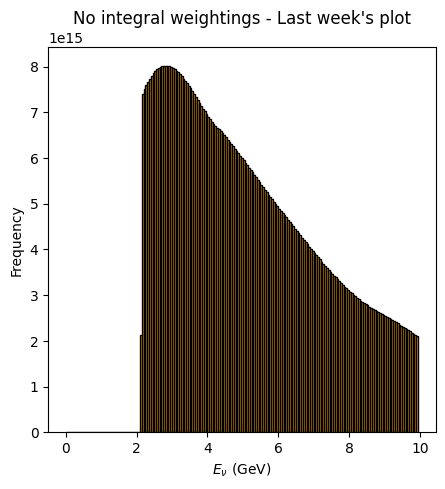

In [ ]:
# Histogram of relative neutrino flux ON BEAN AXIS

E_v , Rel_Neu_Flux , E_pro_array , E_pi  = FIRST_TRY_Relative_Neutrino_Flux_Plotter_includes_Proton_Energy_Uncertainty_and_Pion_Weighting( 0.00 )
#display((np.shape(y_1)))
plt.figure(figsize=(5, 5))
#plt.plot( x_1 , y_1 , "-o" , color = "brown", linewidth = 0.5 , markersize = 1, label = r'$\theta$ = 0.014' )
plt.hist( E_v  , bins = np.arange( 0 , 10 , 0.05 )  , weights =  Rel_Neu_Flux , edgecolor = "black" , ls = "-" , color = "orange" )
plt.title("\n".join(wrap(r"No integral weightings - Last week's plot " , 80 ) ) )
plt.xlabel(r"$E_{\nu}$ (GeV)")
plt.ylabel("Frequency")
plt.show()